In [1]:
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np

In [2]:
def my_conv2(image, filters):
    output = np.zeros(shape=((image.shape[0]-(filters.shape[0])+1),(image.shape[1]-(filters.shape[1])+1)))
    filters = np.flip(np.flip(filters,axis=0),axis=1)
    print("Output shape is ",output.shape)
    k1= (int)((filters.shape[0]-1)/2)
    rem1= filters.shape[0]-(2*k1)
    k2= int((filters.shape[1]-1)/2)
    rem2= filters.shape[1]-(2*k2)
    for i in range(k1,image.shape[0]-k1-1):
        for j in range(k2,image.shape[1]-k2-1):
            image_area= image[i-k1:i+k1+rem1,j-k2:j+k2+rem2]
            temp = np.multiply(image_area,filters)
            temp_sum = np.sum(temp)
            output[i-k1,j-k2]=temp_sum
    return output

In [3]:
image = Image.open('Data/clown.tif').convert('L')

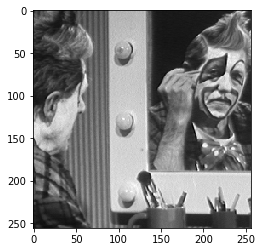

In [4]:
plt.imshow(image,cmap='gray')

In [5]:
image = np.asarray(image)
vertical_edges = np.asarray([[1,0,-1],[2,0,-2],[1,0,-1]]) # verical edge
horizontal_edges = np.asarray([[1,2,1],[0,0,0],[-1,-2,-1]]) # horizontal edges
image=image/255

In [6]:
import timeit
start_time = timeit.timeit()
imageOut_vertical=my_conv2(image, vertical_edges)
end_time = timeit.timeit()
print("Time taken for vertical  is", end_time-start_time)


Output shape is  (254, 254)
Time taken for vertical  is -0.009286412037909031


### Vertical edge detection - Sobel filter

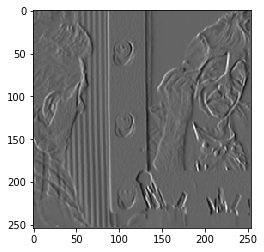

In [7]:
plt.imshow(imageOut_vertical,cmap='gray')

In [8]:
start_time = timeit.timeit()
imageOut_horizontal=my_conv2(image, horizontal_edges)
end_time = timeit.timeit()
print("Time taken for horizontal  is", end_time-start_time)

Output shape is  (254, 254)
Time taken for horizontal  is -0.0006263309624046087


### Horizontal edge detection - Sobel filter

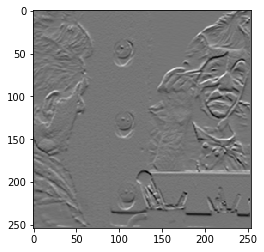

In [9]:
plt.imshow(imageOut_horizontal,cmap='gray')

###  Total edge detection - Sobel filter

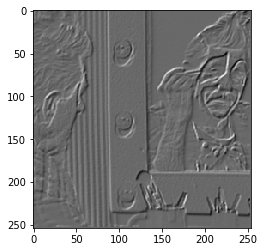

In [10]:
result = imageOut_horizontal+imageOut_vertical
plt.imshow(result,cmap='gray')

###  Laplacian filter

Output shape is  (254, 254)
Time taken for Laplacian  is -0.0007369560189545155


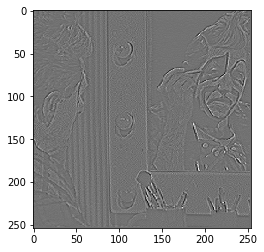

In [11]:
laplacian_filter = np.asarray([[0,-1,0],[-1,4,-1],[0,-1,0]])
start_time = timeit.timeit()
imageOut_laplacian=my_conv2(image, laplacian_filter)
end_time = timeit.timeit()
print("Time taken for Laplacian  is", end_time-start_time)
plt.imshow(imageOut_laplacian,cmap='gray')

### Vertical edge detection - inbuilt function

Time taken for vertical is  -0.00015442073345184326


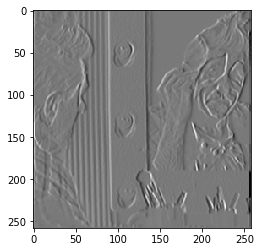

In [12]:
from scipy import signal
start_time = timeit.timeit()
result = signal.convolve2d(image,vertical_edges)
end_time = timeit.timeit()
print("Time taken for vertical is ", end_time-start_time)
plt.imshow(result,cmap='gray')

### Horizontal  edge detection - inbuilt function

Time taken for horizontal is -7.127481512725353e-05


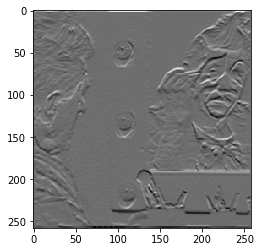

In [13]:
start_time = timeit.timeit()
result = signal.convolve2d(image,horizontal_edges)
end_time = timeit.timeit()
print("Time taken for horizontal is", end_time-start_time)
plt.imshow(result,cmap='gray')

# Laplacian filter - inbuilt function

Time taken for laplacian is -0.00011728284880518913


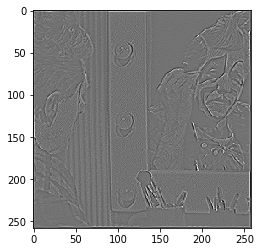

In [14]:
start_time = timeit.timeit()
result = signal.convolve2d(image,laplacian_filter)
end_time = timeit.timeit()
print("Time taken for laplacian is", end_time-start_time)
plt.imshow(result,cmap='gray')